# Traffic Sign Recognition using CNN

* Traffic sign recognition is a vital component of autonomous driving
systems, enabling vehicles to interpret road signs and make decisions accordingly.

* This project aims to build a deep learning model that classifies traffic signs from images using a Convolutional Neural Network (CNN).

* The model is trained on the German Traffic Sign Recognition Benchmark (GTSRB) dataset, which includes over 50,000 labeled images.

* After training, the model is evaluated and deployed as an interactive web application using Streamlit.




## Setup Kaggle API Access

To access and download the GTSRB dataset from Kaggle, we use the Kaggle API. Upload your `kaggle.json` file containing your API credentials and configure the environment accordingly.


In [1]:
!pip install -q kaggle


Upload kaggle.json API Key for Dataset Access

In [2]:
from google.colab import files
files.upload()  # Upload kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anujtrivedib23ch1006","key":"fefd0cd3c948a6bcd1924e48788c4af1"}'}

##Configure Kaggle API Credentials

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


## Download and Load Dataset

The dataset is downloaded from Kaggle and extracted. It consists of preprocessed traffic sign images stored in pickle files (`train.pickle` and `test.pickle`).


In [4]:
!kaggle datasets download -d valentynsichkar/traffic-signs-preprocessed
!unzip traffic-signs-preprocessed.zip -d traffic-signs-data


Dataset URL: https://www.kaggle.com/datasets/valentynsichkar/traffic-signs-preprocessed
License(s): other
 99% 4.14G/4.16G [02:21<00:00, 35.4MB/s]
100% 4.16G/4.16G [02:21<00:00, 31.6MB/s]
Archive:  traffic-signs-preprocessed.zip
  inflating: traffic-signs-data/data0.pickle  
  inflating: traffic-signs-data/data1.pickle  
  inflating: traffic-signs-data/data2.pickle  
  inflating: traffic-signs-data/data3.pickle  
  inflating: traffic-signs-data/data4.pickle  
  inflating: traffic-signs-data/data5.pickle  
  inflating: traffic-signs-data/data6.pickle  
  inflating: traffic-signs-data/data7.pickle  
  inflating: traffic-signs-data/data8.pickle  
  inflating: traffic-signs-data/datasets_preparing.py  
  inflating: traffic-signs-data/label_names.csv  
  inflating: traffic-signs-data/labels.pickle  
  inflating: traffic-signs-data/mean_image_gray.pickle  
  inflating: traffic-signs-data/mean_image_rgb.pickle  
  inflating: traffic-signs-data/std_gray.pickle  
  inflating: traffic-signs-data

##Verifying Directories

In [5]:
import os
# Check if the path exists
print(os.listdir("traffic-signs-data"))


['datasets_preparing.py', 'train.pickle', 'data6.pickle', 'data2.pickle', 'data4.pickle', 'test.pickle', 'mean_image_gray.pickle', 'data7.pickle', 'labels.pickle', 'data5.pickle', 'data8.pickle', 'label_names.csv', 'mean_image_rgb.pickle', 'std_rgb.pickle', 'data3.pickle', 'std_gray.pickle', 'valid.pickle', 'data0.pickle', 'data1.pickle']


##Installing Dependencies

In [6]:
import pickle
import numpy as np
import matplotlib.pyplot as plt


In [7]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

##Load Pickled Training and Testing Data Files

In [8]:
with open("traffic-signs-data/train.pickle", "rb") as f:
    train_data = pickle.load(f)

with open("traffic-signs-data/test.pickle", "rb") as f:
    test_data = pickle.load(f)

# with open("traffic-signs-data/meta.pickle", "rb") as f:
#     meta_data = pickle.load(f)


##Extract Features and Labels from Dataset & Check Shapes

In [9]:
X_train = train_data['features']
y_train = train_data['labels']

X_test = test_data['features']
y_test = test_data['labels']

print("Training shape:", X_train.shape)
print("Test shape:", X_test.shape)


Training shape: (34799, 32, 32, 3)
Test shape: (12630, 32, 32, 3)


## Data Preprocessing

We normalize image pixel values to the range [0, 1] for better training performance. Labels are converted to one-hot encoded vectors, suitable for multi-class classification.


In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0
# y_train = y_train/255.0
# y_test = y_test/255.0

## One-Hot Encode Labels for Multi-Class Classification

In [11]:
from tensorflow.keras.utils import to_categorical

num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


In [12]:
print(y_train.shape)
print(y_test.shape)

(34799, 43)
(12630, 43)


## CNN Model Architecture

We use a Sequential Convolutional Neural Network (CNN) with multiple convolutional layers, ReLU activations, dropout for regularization, and L2 weight penalties. The final layer is a softmax layer predicting one of 43 traffic sign classes.


In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, ReLU
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3, 3), input_shape=(32, 32, 3), kernel_regularizer = regularizers.l2(0.001)),
    ReLU(),
    Dropout(0.5),

    Conv2D(64, (5, 5), kernel_regularizer = regularizers.l2(0.001)),
    ReLU(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.5),

    Conv2D(128, (3, 3)),
    ReLU(),
    MaxPooling2D(pool_size = (2,2)),
    Dropout(0.4),

    Flatten(),
    Dense(512, activation='relu', kernel_regularizer = regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(43, activation='softmax')  # Number of classes

])


## Compile and Train the Model

The model is compiled with the Adam optimizer and categorical crossentropy loss. We train it for 15 epochs with a batch size of 64 and validate on 20% of the training data.


In [57]:
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


##Shuffle The Training Data

In [58]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=42)


#Model Training

In [60]:
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=64,
    validation_split=0.2,
    verbose=1,
    shuffle = True
)


Epoch 1/15
435/435 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9686 - loss: 0.4083 - val_accuracy: 0.9947 - val_loss: 0.3180
Epoch 2/15
435/435 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9702 - loss: 0.3869 - val_accuracy: 0.9958 - val_loss: 0.3257
Epoch 3/15
435/435 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9716 - loss: 0.3957 - val_accuracy: 0.9944 - val_loss: 0.3320
Epoch 4/15
435/435 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9704 - loss: 0.3985 - val_accuracy: 0.9954 - val_loss: 0.3169
Epoch 5/15
435/435 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9713 - loss: 0.3858 - val_accuracy: 0.9954 - val_loss: 0.3268
Epoch 6/15
435/435 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9713 - loss: 0.3902 - val_accuracy: 0.9948 - val_loss: 0.3251
Epoch 7/15
435/435 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9720 - loss: 0.3962 - val_accuracy: 0.9951 - val_loss: 0.3279
Epoch 8/15
435/435 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9721 - loss: 0.3889 - val_accuracy

## Evaluate Model on Test Data

After training, we evaluate the model’s performance on the test dataset. Accuracy and other performance metrics are calculated to measure the generalization ability of the model.


In [67]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = np.argmax(y_test, axis=1)                 # actual class index


accuracy = np.mean(y_pred_classes == y_true)
print("Accuracy:", accuracy)

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.973396674584323


##Load Label Names from CSV File

In [62]:
import pandas as pd
df = pd.read_csv("/content/traffic-signs-data/label_names.csv")


## Visualize Predictions

We visualize some of the predictions made by the model alongside their actual labels and class names to get a qualitative sense of its performance.


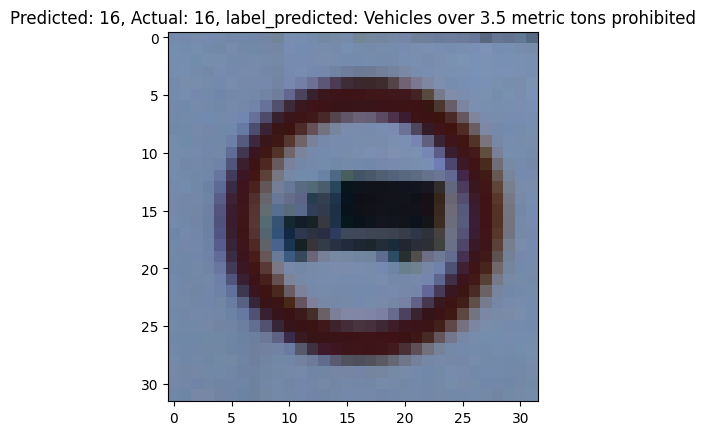

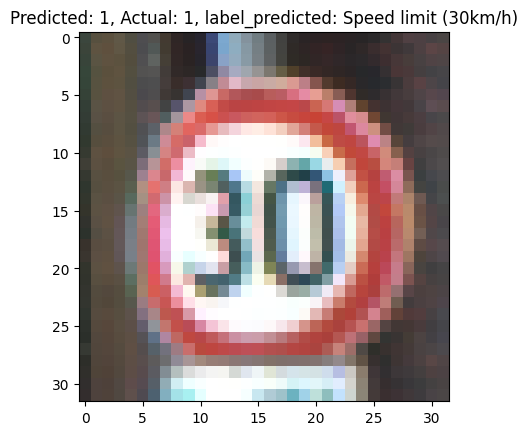

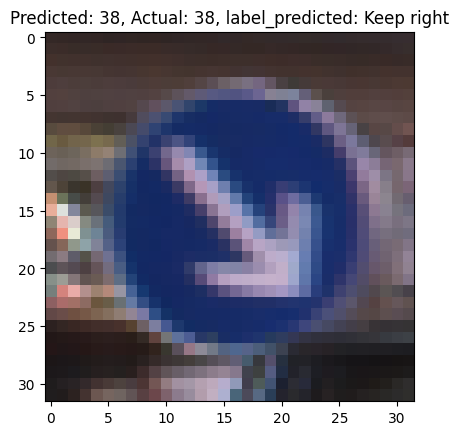

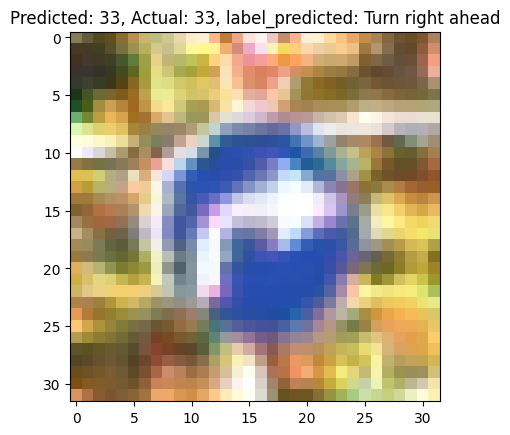

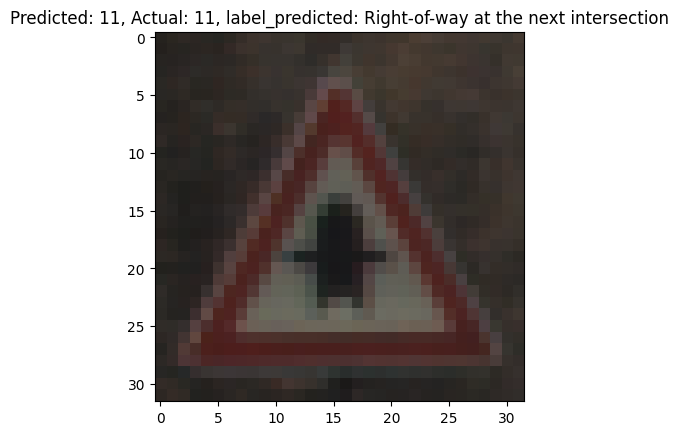

In [63]:
for i in range(5):
    plt.imshow(X_test[i])
    plt.title(f"Predicted: {y_pred_classes[i]}, Actual: {y_true[i]}, label_predicted: {df['SignName'][y_pred_classes[i]]}")
    plt.show()



## Confusion Matrix

To assess how well the model performs across different classes, we plot a confusion matrix. This helps identify specific classes where the model might be underperforming.


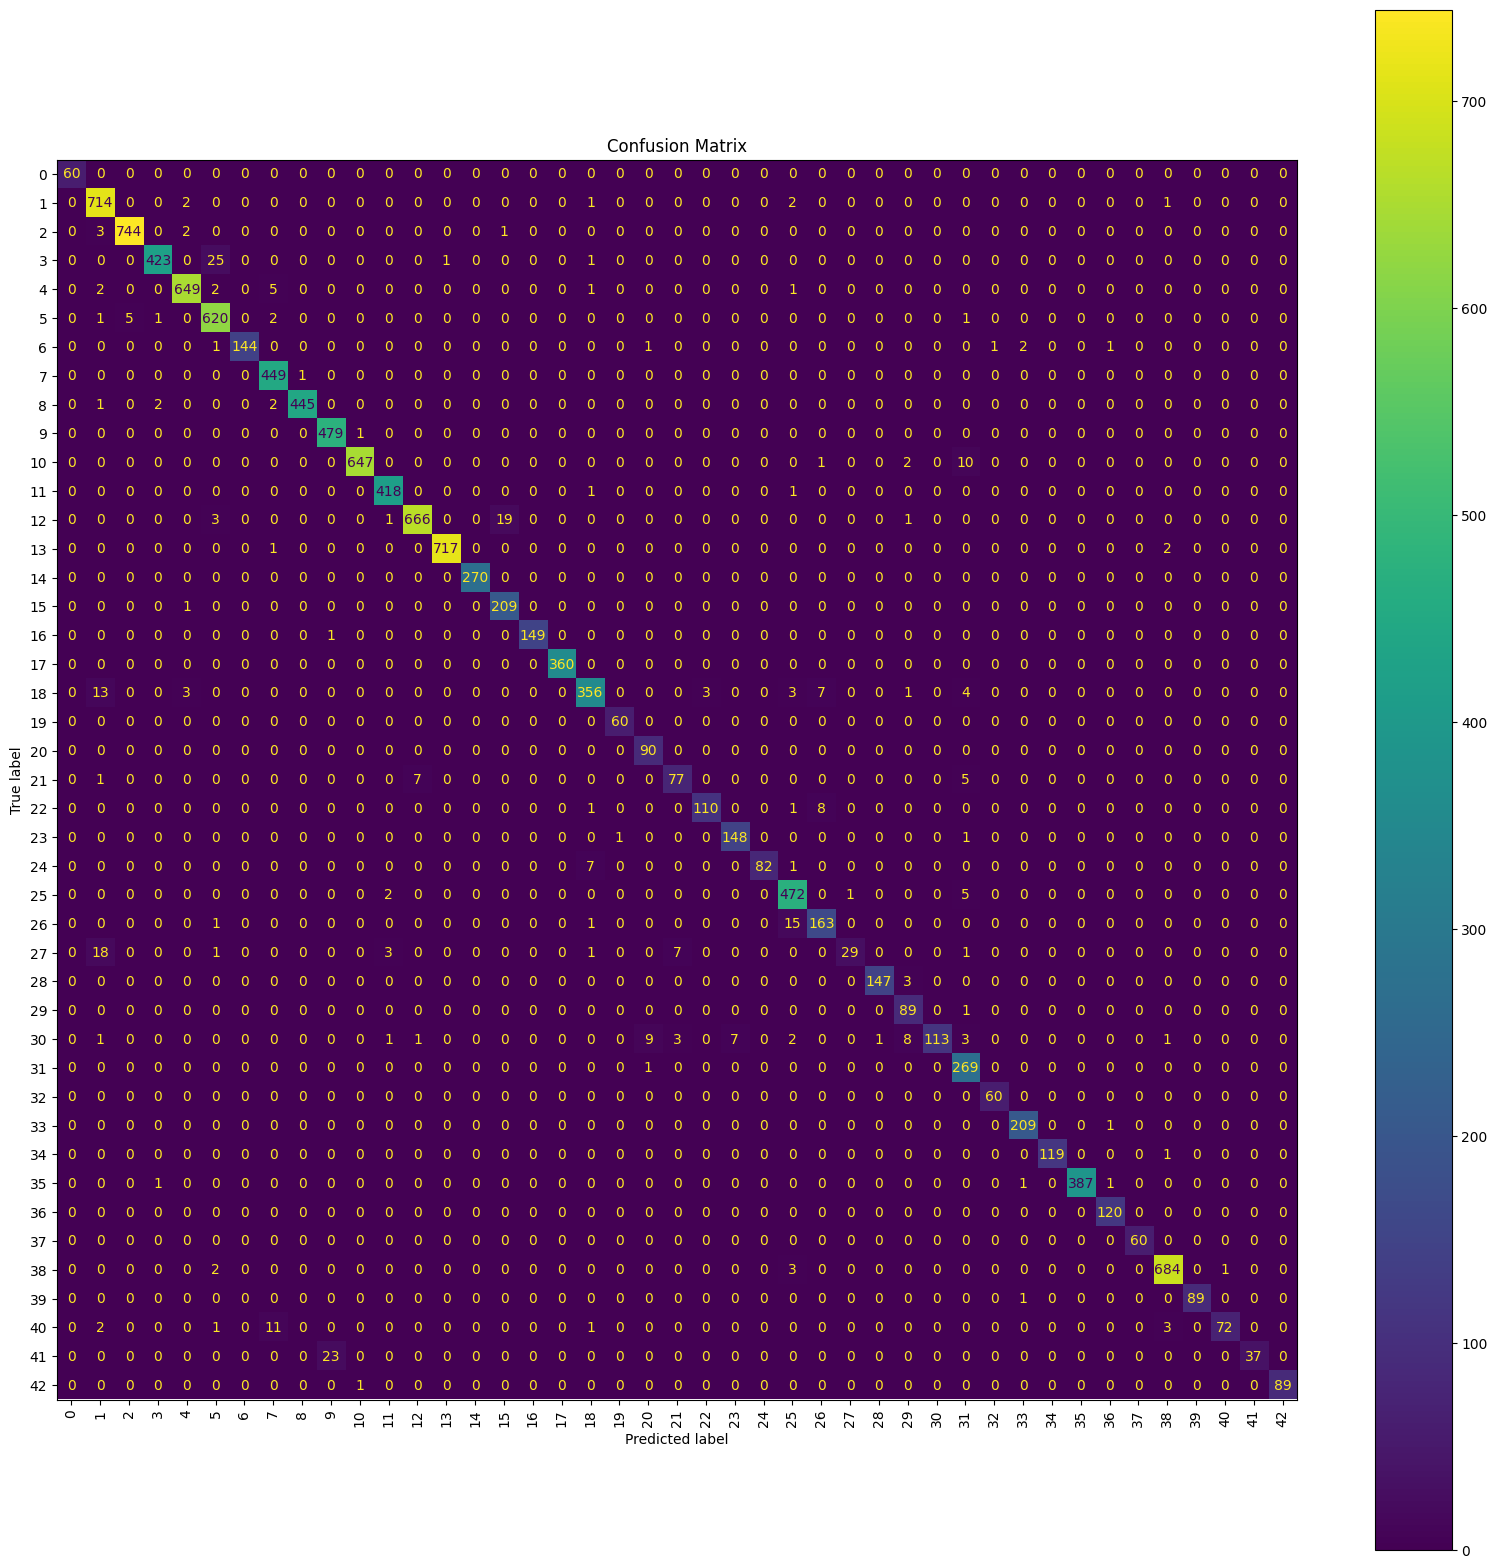

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# y_true and y_pred_classes must already be defined
# y_true = np.argmax(y_test, axis=1)
# y_pred_classes = np.argmax(model.predict(X_test), axis=1)

# 1. Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

fig, ax = plt.subplots(figsize = (20, 20))
# 2. Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax = ax, cmap='viridis', xticks_rotation=90, colorbar=True)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


## Save Trained Model

The trained model is saved in `.keras` format so that it can be loaded later for inference or deployed in a web application.


In [66]:
model.save('traffic_sign_model.keras')


## Streamlit Web App (Optional)

To make the model usable in real-world settings, we deployed it using Streamlit. Users can upload an image, and the app predicts the traffic sign class in real-time using the trained model.


## Conclusion and Future Work

This project demonstrates how deep learning can be effectively applied to traffic sign classification with high accuracy. The CNN achieved strong performance on the test set and was successfully deployed as a user-friendly web app.

### Future Enhancements:
- Implement real-time webcam sign recognition.
- Perform data augmentation to improve robustness.
- Experiment with advanced CNN architectures like ResNet or MobileNet.
- Use Grad-CAM for visual explanations of predictions.
